In [ ]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import make_blobs

I. DATASET

Permet de générer un jeu de données aléatoire de 100 données, avec 2 centres (toxique et non toxique) et 2 caractéristiques (longueur et largeur).

In [ ]:
X, y = make_blobs(n_samples = 100, centers = 2, n_features = 2, random_state = 0)
y = y.reshape((y.shape[0]), 1)

dimensions de X: (100, 2)
dimensions de y: (100, 1)


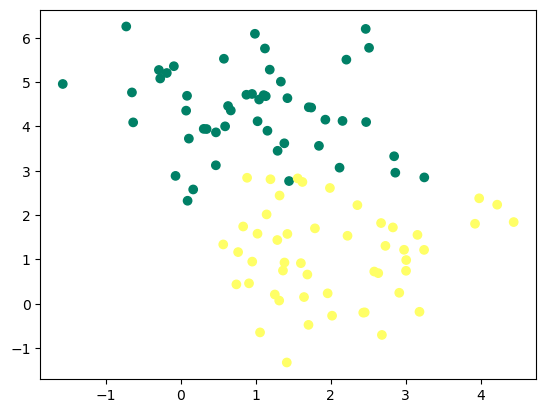

In [21]:
print('dimensions de X:', X.shape)
print('dimensions de y:', y.shape)

plt.scatter(X[:,0], X[:, 1], c=y, cmap='summer')
plt.show()

X doit avoir les dimensions (100, 2) pour 100 données avec 2 caractéristiques (longueur et largeur).
Quant à y ses dimensions sont (100,) car il y a 100 données et c'est un nombre réel, car il vaut soit 0 (toxique) soit 1 (non toxique).

In [22]:
print(X.shape)
print(y.shape)

(100, 2)
(100, 1)


II. FONCTIONS DU MODELE

Désormais, il faut définir les différentes fonctions qui seront nécessaires afin de construire le modèle.

Dans un premier temps, il est de rigueur d'initialiser les valeurs :

In [23]:
def initialisation(X):
    W = np.random.randn(X.shape[1], 1)
    b = np.random.randn(1)
    return (W, b)

Il faut que W soit un vecteur avec "Nombre de paramètres" en lignes. Pour b, il doit être un réel.

Puis, il faut établir le modèle avec la fonction sigmoïde :

In [24]:
def modele(X, W, b):
    Z = np.dot(X, W) + b
    A = 1 / (1 + np.exp(-Z))
    return A

Désormais, il faut définir la cost function qui permettra d'établir la vraisemblance du modèle :

In [25]:
def log_loss(A, y):
    L = - 1 / len(y) * np.sum(y * np.log(A) + (1 - y) * np.log(1 - A))
    return L

Ensuite, il est nécessaire de renvoyer les deux gradients (dW et db) afin de corriger les erreurs des deux vecteurs W et b :

In [26]:
def gradients(A, X, y):
    dW = 1 / len(y) * np.dot(X.T, A - y)
    db = 1 / len(y) * np.sum(A - y)
    return (dW, db)

Enfin, il est nécessaire de définir une fonction pour mettre à jour les paramètres :

In [27]:
def update(W, b, dW, db, learning_rate):
    W = W - learning_rate * dW
    b = b - learning_rate * db
    return W, b

Pour finir, une fonction predict permettant de prédire le résultat. Le modèle renvoyant une probabilité via la fonction sigmoïde, si cette dernière est >= 0.5 alors elle sera non toxique sinon elle le sera :

In [28]:
def predict(X, W, b):
    A = modele(X, W, b)
    # Permet d'afficher la probabilité de toxicité
    print(A)
    return A >= 0.5

In [29]:
from sklearn.metrics import accuracy_score

Une fois que toutes les fonctions sont définies, il est désormais possible de créer le premier neurone :

In [30]:
def artificial_neuron(X, y, learning_rate = 0.1, iteration = 100):
    # Initialisation
    W, b = initialisation(X)

    # Tableau pour afficher l'historique des erreurs
    Loss = []

    for i in range(iteration):
        # Probabilité des données d'appartenance
        A = modele(X, W, b)

        # Estimation de l'erreur
        Loss.append(log_loss(A, y))

        # Correction
        dW, db = gradients(A, X, y)
        W, b = update(W, b, dW, db, learning_rate)

    y_pred = predict(X, W, b)
    print(accuracy_score(y, y_pred))

    plt.plot(Loss)
    plt.show()

    return (W, b)

[[9.71289023e-01]
 [7.32594261e-01]
 [5.53630790e-03]
 [1.26147114e-01]
 [9.63805800e-01]
 [3.48695976e-01]
 [7.37359559e-02]
 [9.55378376e-01]
 [4.84561199e-02]
 [8.46675827e-01]
 [3.26523106e-02]
 [8.60468813e-01]
 [2.95150474e-02]
 [1.78044472e-02]
 [7.10999471e-01]
 [9.85261115e-01]
 [9.90152187e-01]
 [3.59069435e-02]
 [6.92724273e-01]
 [6.25591240e-01]
 [4.93230694e-02]
 [3.76741226e-02]
 [3.87162426e-01]
 [5.47905843e-03]
 [9.48368663e-01]
 [3.46566937e-02]
 [8.72473553e-01]
 [1.02941656e-02]
 [7.32056705e-02]
 [7.51730523e-01]
 [9.74797425e-01]
 [4.75439784e-02]
 [6.38714239e-01]
 [9.75261361e-01]
 [4.07954150e-01]
 [2.56252129e-01]
 [7.59360017e-01]
 [5.60069414e-01]
 [4.86726207e-01]
 [4.19845502e-01]
 [6.23975563e-02]
 [9.37751139e-02]
 [9.45197821e-04]
 [1.72854852e-01]
 [1.93626836e-01]
 [8.36709473e-01]
 [9.60239106e-01]
 [9.51840204e-01]
 [4.66016215e-03]
 [1.06092909e-02]
 [9.30772869e-01]
 [5.27021793e-01]
 [5.97315324e-02]
 [4.61704729e-02]
 [8.37157085e-01]
 [4.656420

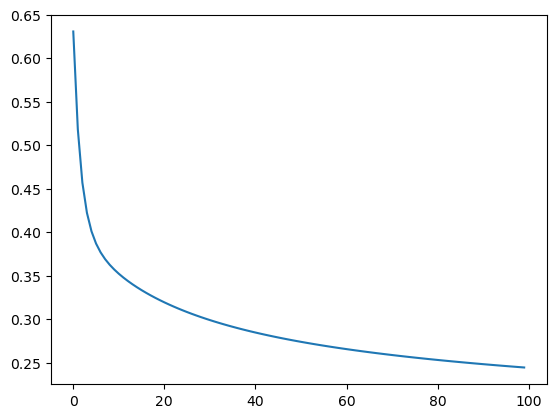

In [31]:
W, b = artificial_neuron(X, y)

Pour une nouvelle plante ayant une longueur de 2cm et une largeur de 1cm, la plante sera-t-elle toxique ? On peut essayer de le déterminer grâce à la fonction predict :

dimensions de X: (100, 2)
dimensions de y: (100, 1)


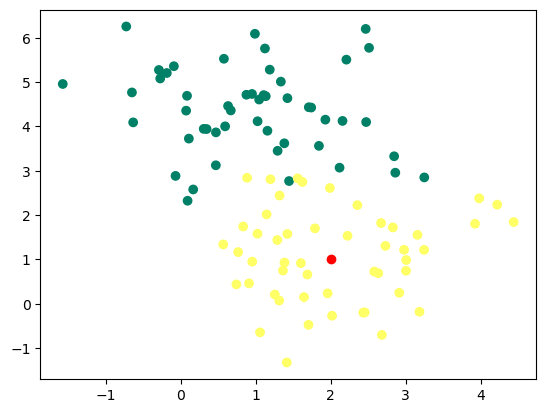

In [32]:
new_plant = np.array([2, 1])

print('dimensions de X:', X.shape)
print('dimensions de y:', y.shape)

plt.scatter(X[:,0], X[:, 1], c=y, cmap='summer')
plt.scatter(new_plant[0], new_plant[1], c='red', cmap='summer')
plt.show()

In [33]:
predict(new_plant, W, b)

[0.86791048]


array([ True])

La plante ayant pour longueur 2cm et comme largeur 1cm est donc toxique à 86% !

III. LIGNE DE DECISION

N.B. Il est possible de tracer la frontière de décision étant donné qu'on connaît l'expression de Z. Il faut déterminer l'expression de la largeur en fonction de la longueur tel que Z = 0. Autrement dit il faut manipuler l'expression Z = w1*x1 + w2*x2 + b = 0 soit x2 = (-b - w1*x1) / w2

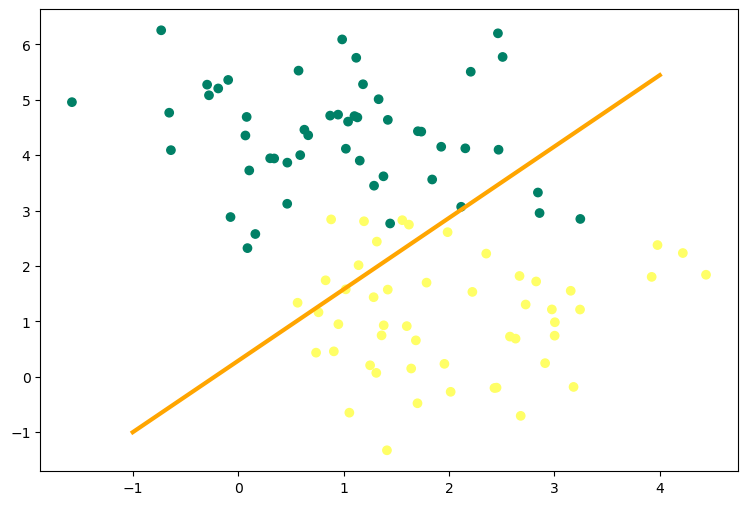

In [34]:
fig, ax = plt.subplots(1, 1, figsize=(9,6))
ax.scatter(X[:,0], X[:, 1], c=y, cmap='summer')

x1 = np.linspace(-1, 4, 100)
x2 = (-b - W[0] * x1) / W[1]

ax.plot(x1, x2, c='orange', lw=3)

IV. VISUALISATION 3D

In [35]:
import plotly.graph_objects as go

In [37]:
fig = go.Figure(data=[go.Scatter3d(
    x=X[:, 0].flatten(),
    y=X[:, 1].flatten(),
    z=y.flatten(),
    mode='markers',
    marker=dict(
        size=5,
        color=y.flatten(),
        colorscale='YlGn',
        opacity=0.8,
        reversescale=True
    )
)])

fig.update_layout(template= "plotly_dark", margin=dict(l=0, r=0, b=0, t=0))
fig.layout.scene.camera.projection.type = "orthographic"
fig.show()

In [38]:
X0 = np.linspace(X[:, 0].min(), X[:, 0].max(), 100)
X1 = np.linspace(X[:, 1].min(), X[:, 1].max(), 100)
xx0, xx1 = np.meshgrid(X0, X1)
Z = W[0] * xx0 + W[1] * xx1 + b
A = 1 / (1 + np.exp(-Z))

fig = (go.Figure(data=[go.Surface(z=A, x=xx0, y=xx1, colorscale='YlGn', opacity = 0.7, reversescale=True)]))

fig.add_scatter3d(x=X[:, 0].flatten(), y=X[:, 1].flatten(), z=y.flatten(), mode='markers', marker=dict(size=5, color=y.flatten(), colorscale='YlGn', opacity = 0.9, reversescale=True))


fig.update_layout(template= "plotly_dark", margin=dict(l=0, r=0, b=0, t=0))
fig.layout.scene.camera.projection.type = "orthographic"
fig.show()